<a href="https://colab.research.google.com/github/O00O297/CCA-AI/blob/master/AutoEncoderFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
from skimage.transform import resize
# Load Images from a folder
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import cv2
from os import walk

mypath = '/content/drive/My Drive/CCA-AI/encoder/' # edit with the path to your data
files = [x[2] for x in walk(mypath)][0]
X = []
i = 0
for file in files:
    # label = file.split('_')[0] # assuming your img is named like this "eight_1.png" you want to get the label "eight"
    img = cv2.imread(mypath+'/'+file, 0)
    img_resize = cv2.resize(img, (128,128))
    X.append(img_resize)
    if i % 500 == 0:
      print(i)
    i += 1

X = np.asarray(X)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000


(128, 128)


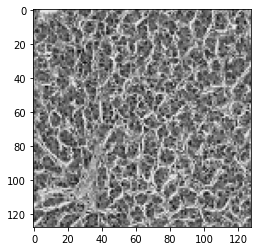

(5075, 128, 128)
(52, 128, 128)


In [19]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

x = X[0]
print(x.shape)
plt.imshow(x, cmap='gray')
plt.show()
X_train, X_test = train_test_split(X, test_size=0.01, random_state=42)
print(X_train.shape)
print(X_test.shape)

In [20]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [21]:
IMG_SHAPE = X.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE,128)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 128, 128)]        0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 128)               2097280   
_________________________________________________________________
sequential_7 (Sequential)    (None, 128, 128)          2113536   
Total params: 4,210,816
Trainable params: 4,210,816
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=350,
                validation_data=[X_test, X_test])  

Epoch 1/350
159/159 [==============================] - 6s 41ms/step - loss: 4613.5435 - val_loss: 0.0000e+00
Epoch 2/350
159/159 [==============================] - 7s 42ms/step - loss: 1338.2368 - val_loss: 0.0000e+00
Epoch 3/350
159/159 [==============================] - 7s 41ms/step - loss: 1335.7096 - val_loss: 0.0000e+00
Epoch 4/350
159/159 [==============================] - 6s 39ms/step - loss: 1333.1064 - val_loss: 0.0000e+00
Epoch 5/350
159/159 [==============================] - 6s 40ms/step - loss: 1328.6964 - val_loss: 0.0000e+00
Epoch 6/350
159/159 [==============================] - 6s 40ms/step - loss: 1320.8234 - val_loss: 0.0000e+00
Epoch 7/350
159/159 [==============================] - 6s 40ms/step - loss: 1306.2198 - val_loss: 0.0000e+00
Epoch 8/350
159/159 [==============================] - 6s 40ms/step - loss: 1282.0676 - val_loss: 0.0000e+00
Epoch 9/350
159/159 [==============================] - 6s 40ms/step - loss: 1248.8307 - val_loss: 0.0000e+00
Epoch 10/350
159/15

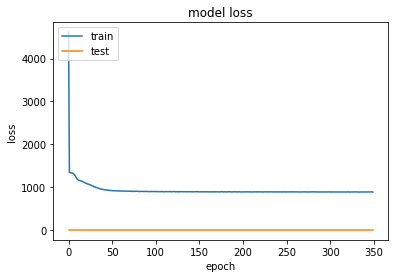

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

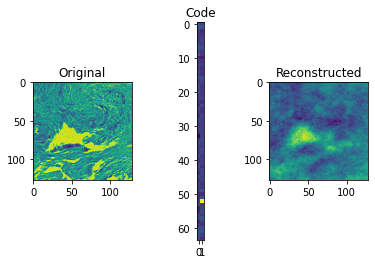

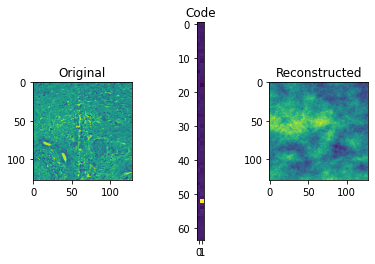

In [24]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco)
    plt.show()

for i in range(2):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [47]:
img = X[0]
print(autoencoder.predict(img[None])[0])


[[148.52426 153.38213 166.64314 ... 141.93753 145.82117 145.9338 ]
 [148.76154 152.81976 163.49094 ... 148.2969  147.73051 146.01979]
 [153.32936 156.43639 159.64883 ... 151.33647 151.58034 153.73062]
 ...
 [141.98576 139.79437 138.42584 ... 150.30418 144.76688 144.54979]
 [133.21101 136.92093 140.21574 ... 145.88287 140.86588 147.00716]
 [135.24022 134.21585 133.66806 ... 149.16776 145.99059 145.94714]]


In [26]:
autoencoder.save("/content/drive/Shared drives/CCA-AI Slide/Dataset/Model/modelAutoEncoder1.h5")

In [44]:
code = encoder.predict(img[None])[0]
print(code)
print("-------")
reco = decoder.predict(code[None])[0]
print(reco)

[ 2.26824142e+02 -2.99789858e+00  2.84238525e+02  2.96561462e+02
  4.71562653e+01 -2.16532288e+02 -5.27758064e+01 -1.13259804e+02
 -3.56190262e+01  2.87255096e+01 -9.82903900e+01  6.62953491e+01
  1.45204819e+02  1.92079678e+01  2.47763550e+02  2.06535385e+02
  1.06666885e+02 -5.22777748e+01  4.39481812e+02 -4.57853165e+01
 -1.69516861e+02 -3.30996704e+02 -2.17462692e+01 -5.87365417e+01
  7.18043594e+01 -5.30635405e+00  3.77123604e+01 -1.25407341e+02
  1.83962296e+02 -1.30853943e+02 -1.19391689e+01 -1.44839813e+02
  1.66582260e+02  1.96480499e+02 -1.63624611e+01  1.76556961e+02
  1.75402008e+02 -4.44535637e+01  1.61444351e+02 -1.03920868e+02
  1.84162003e+02 -1.08102055e+01  1.83627586e+01 -4.48523788e+01
  2.70165825e+01  4.25487251e+01 -1.05276527e+02 -1.34634048e+02
 -1.70942276e+02  1.74729340e+02  1.25288528e+02 -1.34387878e+02
  7.19970703e+00 -1.06459251e+02 -1.83444382e+02  7.94506531e+01
  8.76229935e+01  2.76641407e+01  4.45007286e+01 -2.19076633e+01
 -1.03761513e+02 -2.47344

In [36]:
codeg = []
for i in range(len (X_test)):
    img = X_test[i]
    c = getcode(img,encoder)
    codeg.append(c)

In [38]:
len(codeg)

52

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import cv2


In [5]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
from os import walk
from sklearn.cluster import KMeans
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import natsort 


mypath = "/content/drive/My Drive/CCA-AI/KMean/"
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
imagePath = natsort.natsorted(f)
x_data = np.empty((0,128), int)

for i in range(len(imagePath)):
# for i in range(200):
  img = cv2.imread(mypath+imagePath[i], 0)
  img_resize = cv2.resize(img, (128,128))
  feature = getcode(img_resize,encoder)
  x_data = np.append(x_data, [feature], axis = 0)
  if i % 100 == 0 :
    print(i)

print(x_data.shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
(4585, 128)


In [ ]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_data)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


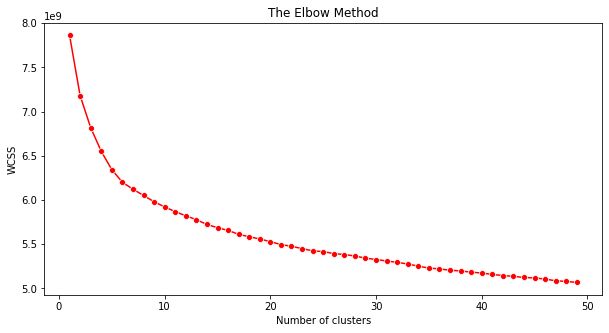

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 50), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_data)
print (kmeans.cluster_centers_)
np.savetxt("/content/drive/Shared drives/CCA-AI Slide/Dataset/kmean_centroid/autoencoder_5_1.txt",kmeans.cluster_centers_ , fmt="%s")

[[ 1.87634058e+01 -1.96438845e+01 -2.23784281e+01 -1.94305760e+00
   1.86796002e+01 -2.47451891e+01 -6.33776703e+00 -1.60342039e+01
  -1.39729925e+01 -1.73457270e+01  9.94737505e+00 -7.06671277e+00
   2.61285227e+01 -3.40857357e+01 -1.60727374e+00  1.07619597e+01
   4.03885749e+00 -9.92639979e+00  1.47466300e+01  4.07683554e+01
  -4.45591428e+00  3.06297529e+00 -1.85605431e+00 -2.42379741e-01
  -8.91039142e+00  3.40097857e+01  3.79109328e+00 -1.75674383e+01
  -1.17719511e+01  1.51123468e+01  4.58719375e+00  1.45423508e+01
  -1.09441115e+01 -7.71166188e+00  2.70298009e+01 -5.43325652e+01
  -2.48652563e+00 -1.14578338e+01 -2.62775367e+00 -2.23454232e+01
  -1.31210279e+01  1.70688079e+01 -1.03146784e+01 -1.58343996e+01
  -6.54827559e+00  1.20990391e+01 -5.87977071e-01  5.95396236e+00
   1.12213339e+01  5.96227330e+01  3.43305399e+01 -1.39097973e+01
   8.68495048e+00 -6.75592892e+00 -7.23692432e+00 -3.18679061e+01
  -1.69473317e+00  3.10682653e+00  7.99789185e+00 -1.46320220e+01
   4.16871

In [7]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_data)
print (kmeans.cluster_centers_)
np.savetxt("/content/drive/Shared drives/CCA-AI Slide/Dataset/kmean_centroid/autoencoder_10_1.txt",kmeans.cluster_centers_ , fmt="%s")

[[  25.40172574  -37.60955198  -58.90517823 ...   17.33242817
   -26.80316905  -95.37873894]
 [  20.73603218  -18.28283063  -21.14446537 ...   10.2422475
    -8.57096816  -33.1832048 ]
 [  44.1343752   -25.60206808  -35.96039652 ...   25.36039729
     4.47085208  -47.72022011]
 ...
 [  23.96323197   -9.46283635  -65.1788012  ...   20.68449693
   -20.91021944    9.96272779]
 [  27.16609637   -6.51909963  -29.59589867 ...   -9.52753542
   -19.08385271 -104.88569472]
 [  30.22359166  -11.08758059  -38.78307008 ...   21.21192508
   -22.86853844   26.07093016]]


In [8]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_data)
print (kmeans.cluster_centers_)
np.savetxt("/content/drive/Shared drives/CCA-AI Slide/Dataset/kmean_centroid/autoencoder_20_1.txt",kmeans.cluster_centers_ , fmt="%s")

[[  39.16201331   46.89290968  -23.38667918 ...   39.05349767
   -41.02905573  -95.54005632]
 [  25.08368097  -23.09740614  -51.57010423 ...  -23.90202486
    24.67882738 -408.08543669]
 [  18.04124251  -17.16794027  -29.62188619 ...    7.86805607
    -9.62259082  -34.60608508]
 ...
 [  13.36904782  -11.42610781  -51.07531681 ...   37.15040216
   -29.38807846   -9.28795022]
 [  52.37469456  -18.2071152    -8.62137809 ...   -7.74931882
   -65.52727123 -510.83355843]
 [  16.77469114  -27.03509938  -28.35852633 ...   13.51676406
   -13.79881004  -56.97485647]]
